<a href="https://colab.research.google.com/github/abhaykantiwal/News-Article-Classification/blob/main/classification_of_news_articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
import pandas as pd
import seaborn as sb
import os
from wordcloud import WordCloud as wc
import matplotlib.pyplot as plt
import pickle
import nltk
from nltk.corpus import stopwords
from wordcloud import STOPWORDS
from nltk.stem import WordNetLemmatizer as wnl
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from nltk.tokenize import word_tokenize
import re
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("data.csv")

In [ ]:
data

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [ ]:
data['Category'].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [ ]:
data.shape, data.dtypes

((1490, 3),
 ArticleId     int64
 Text         object
 Category     object
 dtype: object)

In [ ]:
# checking if any void/null value exist in the data
data.isnull().any()

ArticleId    False
Text         False
Category     False
dtype: bool

<Axes: xlabel='count', ylabel='Category'>

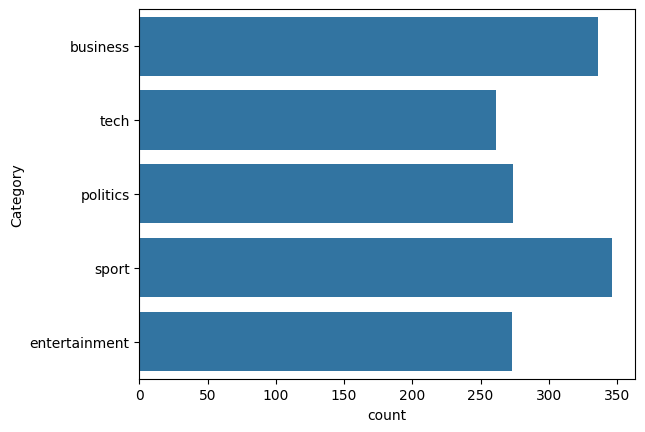

In [ ]:
## checking number of instances of different class
sb.countplot(data.Category)

In [ ]:
## there are five news categories and the number of instances/articles of each type of category will be:
data['Category'].value_counts()

Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64

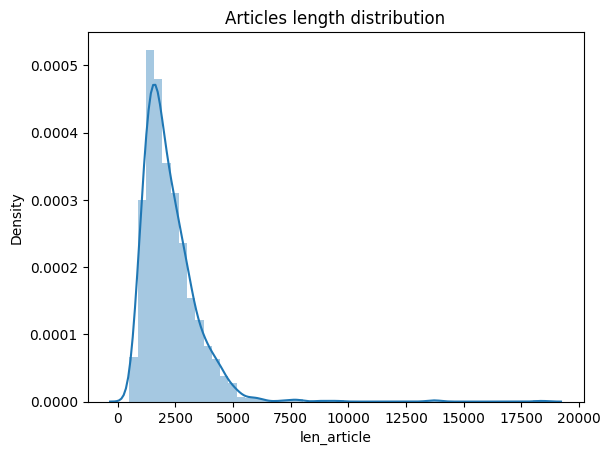

In [ ]:
## checking the distribution of number of words in each article
data['len_article'] = data['Text'].str.len()
sb.distplot(data['len_article']).set_title("Articles length distribution");

# Cleaning Data

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def cleaning_data(text):
    text = text.lower().replace('\n',' ').replace('\r','').strip()
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]','',text)
    stop_words = set(stopwords.words('english'))
    wordtokens = word_tokenize(text)
    cleaneddata = [w for w in wordtokens if not w in stop_words]
    cleaneddata = []
    for w in wordtokens:
        if w not in stop_words:
            cleaneddata.append(w)
    text = " ".join(cleaneddata)
    return text

In [ ]:
from nltk.corpus import stopwords
data['cleandata']= data['Text'].apply(cleaning_data)

In [ ]:
data.head()

,ArticleId,Text,Category,len_article,cleandata
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses 168m payout eighteen former enron...


In [ ]:
label_encoder = preprocessing.LabelEncoder()
data['Category_target']= label_encoder.fit_transform(data['Category'])
data.head()

,ArticleId,Text,Category,len_article,cleandata,Category_target
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...,0
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...,0
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...,4
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses 168m payout eighteen former enron...,0


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(data['cleandata'],
                                                    data['Category_target'],
                                                    test_size=0.2,
                                                    random_state=8)

In [ ]:

ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [ ]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)

features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train)
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test)
print(features_test.shape)

[[0.0894863  0.         0.         ... 0.         0.0463896  0.06766975]
 [0.05487433 0.         0.07150257 ... 0.03962281 0.08154977 0.070259  ]
 [0.         0.         0.         ... 0.11423937 0.13886684 0.        ]
 ...
 [0.13256211 0.         0.17273162 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.04393444 0.         0.        ]]
(1192, 300)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.06663471 0.1699869  0.        ]
 [0.         0.         0.         ... 0.08769709 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.07369283 0.2337518  0.        ]
 [0.         0.         0.         ... 0.05544694 0.         0.        ]
 [0.         0.         0.15065227 ... 0.14134942 0.10148038 0.        ]]
(298, 300)


# Building ML Model
So far we have performed the cleaning operation on our data, have got training and testing features. Now we shall build our machine learning model which will classify the articles into different categories

# Random Forest Classifier
We are going to see how random foresr classifier works on the given problem

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
model1  = RFC(random_state=21)
model1.fit(features_train, labels_train)
model_predictions = model1.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9261744966442953
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        76
           1       0.93      0.89      0.91        47
           2       0.91      0.91      0.91        55
           3       0.94      0.97      0.95        65
           4       0.95      0.95      0.95        55

    accuracy                           0.93       298
   macro avg       0.93      0.93      0.93       298
weighted avg       0.93      0.93      0.93       298



### random forest classifier is giving a good accuracy of 92.6 percent

now, lets get the parameters for random forest classifier

In [ ]:
model1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 21,
 'verbose': 0,
 'warm_start': False}

## now, we are going to tune the hyper parameters of our model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter ranges
param_dist = {
    'n_estimators': randint(100, 501),  # Limit the range of n_estimators
    'max_depth': randint(5, 16),         # Limit the range of max_depth
    'min_samples_split': randint(2, 11), # Limit the range of min_samples_split
    'min_samples_leaf': randint(1, 6)     # Limit the range of min_samples_leaf
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    model1,
    param_distributions=param_dist,
    n_iter=10,  # Limit the number of iterations
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the RandomizedSearchCV instance
random_search.fit(features_train, labels_train)

# Get the best hyperparameters
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_


Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
best_params = random_search.best_params_
best_params

{'max_depth': 15,
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'n_estimators': 209}

#### The above parameters are the best parameters that we got after applying cross validation on Random Forest Classifier. Though, we can still improve our model but doing so will increase the training time of our model (model will take a long time in execution of code).


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2  = RandomForestClassifier(random_state=1,max_depth= 30, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
model2.fit(features_train, labels_train)
model_predictions = model2.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9328859060402684
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        76
           1       0.94      0.94      0.94        47
           2       0.91      0.91      0.91        55
           3       0.94      0.98      0.96        65
           4       0.93      0.96      0.95        55

    accuracy                           0.93       298
   macro avg       0.93      0.94      0.93       298
weighted avg       0.93      0.93      0.93       298



#### Clearly, here our accuracy using random forest classifier is improved, hence use of cross validation on our model has improved the accuracy.

## We can also apply the logistic regression model on our problem as it is also helpful in classification problem and see how much accuracy it gives.

# New Section